In [35]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np 
import psutil
import os

In [38]:
N = int(1e5)
Ndim = 8

data_lst = []
for i in range(6):

    mean = (10*i + 1)*np.random.rand(Ndim)
    cov = np.random.rand(Ndim,Ndim)

    cov = cov@cov.T
    
    data_lst.append(np.random.multivariate_normal(mean=mean, cov=cov, size=(N)))

    # print(mean, cov)

# data = np.vstack([x for x in data_lst])

data = np.loadtxt('../../W-He_102/Core_-1/Sample/Filtered_Samples.txt')

print(data.mean(), data.std())
# Get the process ID
process_id = os.getpid()

# Get the process object
process = psutil.Process(process_id)

# Get the number of CPU cores used by the process
cpu_cores = psutil.cpu_count(logical=False)  # logical=False gives you physical cores

print(f"The process is using {cpu_cores} core(s).")

# print(gm.means_, gm.covariances_)

# print(gm.converged_, gm.n_iter_)

# Fit GMMs with different numbers of components

cmp = 1
gmm = GaussianMixture(n_components=cmp, covariance_type='full', reg_covar=0.1)
gmm.fit(data)
bic_val = gmm.bic(data)
bic_val_prev = bic_val
print(cmp, bic_val)
while True:

    cmp += 1
    bic_val_prev = bic_val
    gmm = GaussianMixture(n_components=cmp, covariance_type='full', reg_covar=0.1)
    gmm.fit(data)
    bic_val = gmm.bic(data)
    print(cmp, bic_val, bic_val_prev)

    if 1.01*bic_val > bic_val_prev:
        break

print(cmp - 1)
gmm = GaussianMixture(n_components=cmp - 1 , covariance_type='full')
gmm.fit(data)

print(data[0,:])

3.7393696430922967 13.928814217045174
The process is using 10 core(s).
1 3471.2724017456408
2 3598.479264440989 3471.2724017456408
1
[ 17.77079219  -1.75659803   3.91159664 -36.28906608   0.28932017
  -7.04295626  32.83283369]


[[[ 2.76307926e+01 -4.02180761e-01  1.13948660e-01  5.51344492e+00
   -1.17563398e+00  4.00232178e+00 -1.01035807e+01]
  [-4.02180761e-01  1.16769723e+00 -8.34315396e-01  2.94379531e+00
    2.44350670e-01 -6.88919880e-01 -3.43768903e+00]
  [ 1.13948660e-01 -8.34315396e-01  3.40274280e+01 -3.79262503e+01
    1.46283488e+00 -6.94700046e+00  2.47842724e+00]
  [ 5.51344492e+00  2.94379531e+00 -3.79262503e+01  7.81575922e+02
    2.23065110e+00  1.37010148e+01 -1.00502215e+02]
  [-1.17563398e+00  2.44350670e-01  1.46283488e+00  2.23065110e+00
    5.48650277e-01 -2.20945363e+00  3.64668725e+00]
  [ 4.00232178e+00 -6.88919880e-01 -6.94700046e+00  1.37010148e+01
   -2.20945363e+00  1.83990480e+01 -5.67921680e+01]
  [-1.01035807e+01 -3.43768903e+00  2.47842724e+00 -1.00502215e+02
    3.64668725e+00 -5.67921680e+01  2.43216649e+02]]]


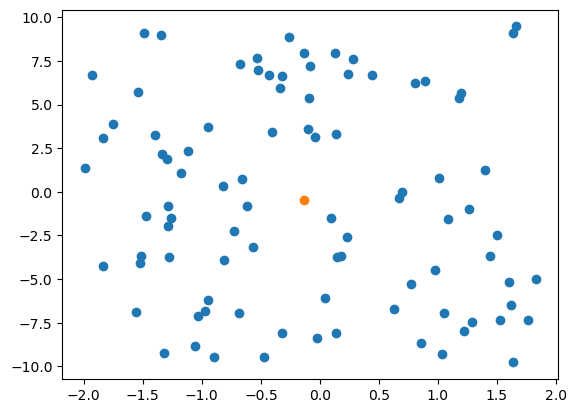

In [39]:
plt.scatter(data[:,1], data[:,2])
plt.scatter(gmm.means_[:,1], gmm.means_[:,2])

print(gmm.covariances_)